In [ ]:
# working code to plot the nodes and connect to desired amount of neighbouring nodes
# added ignore list
# removed duplicated node locations

import pandas as pd
from geopy.distance import great_circle
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from heapq import nsmallest

# Define the number of nodes to create connections for
num_connections = 10

ignore_list = [(36.068619, -115.211891),(35.759998,-115.760002),(35.650002,-115.650002), (41.2345, -112.6789), (42.3456, -113.7890)]

data = pd.read_csv('./detector/detectors2018.csv')

#data = data.dropna(subset=['latitude', 'longitude'])  # Drop rows with missing values in lat/long
latitude = data.iloc[:, 5].astype(str).apply(lambda x: float(x[:2] + '.' + x[2:]))
longitude = data.iloc[:, 6].astype(str).apply(lambda x: float(x[:4] + '.' + x[4:]))
ids = data.iloc[:, 1]

locations, index = np.unique(np.column_stack((latitude, longitude)), axis=0, return_index=True)
ids = ids[index]

# Check if each location is in the ignore list and remove it if it is
mask = [tuple(loc) not in ignore_list for loc in locations]
locations = locations[mask]
ids = ids[mask]

# Calculate the distance matrix between all remaining locations
dist_matrix = distance_matrix(locations, locations)

graph = {}

for i in range(len(locations)):
    graph[i] = []

# Connect each node to the closest num_connections nodes
for i in range(len(locations)):
    closest = nsmallest(num_connections+1, range(len(dist_matrix[i])), key=lambda x: dist_matrix[i][x])
    closest.remove(i)
    for j in closest:
        graph[i].append(j)

plt.figure(figsize=(8, 8))
for i in range(len(locations)):
    for j in graph[i]:
        plt.plot([locations[i][1], locations[j][1]], [locations[i][0], locations[j][0]], 'k-', linewidth=0.5)
plt.scatter(locations[:,1], locations[:,0], s=10, c='r')
plt.show()


In [68]:
# Working Second iteration of the first code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from heapq import nsmallest

# Define the number of nodes to create connections for
num_connections = 5

ignore_list = [(36.068619, -115.211891),(35.759998,-115.760002),(35.650002,-115.650002), (41.2345, -112.6789), (42.3456, -113.7890)]

data = pd.read_csv('./detector/detectors2018.csv')

#data = data.dropna(subset=['latitude', 'longitude'])  # Drop rows with missing values in lat/long
latitude = data.iloc[:, 5].astype(str).apply(lambda x: float(x[:2] + '.' + x[2:]))
longitude = data.iloc[:, 6].astype(str).apply(lambda x: float(x[:4] + '.' + x[4:]))
ids = data.iloc[:, 1]

locations, index = np.unique(np.column_stack((latitude, longitude)), axis=0, return_index=True)
ids = ids[index]

# Check if each location is in the ignore list and remove it if it is
mask = [tuple(loc) not in ignore_list for loc in locations]
locations = locations[mask]
ids = ids[mask]

# Calculate the distance matrix between all remaining locations
dist_matrix = distance_matrix(locations, locations)

graph = {}

for i in range(len(locations)):
    graph[i] = []

# Connect each node to the closest num_connections nodes
for i in range(len(locations)):
    closest = nsmallest(num_connections+1, range(len(dist_matrix[i])), key=lambda x: dist_matrix[i][x])
    closest.remove(i)
    for j in closest:
        graph[i].append((j, dist_matrix[i][j]))



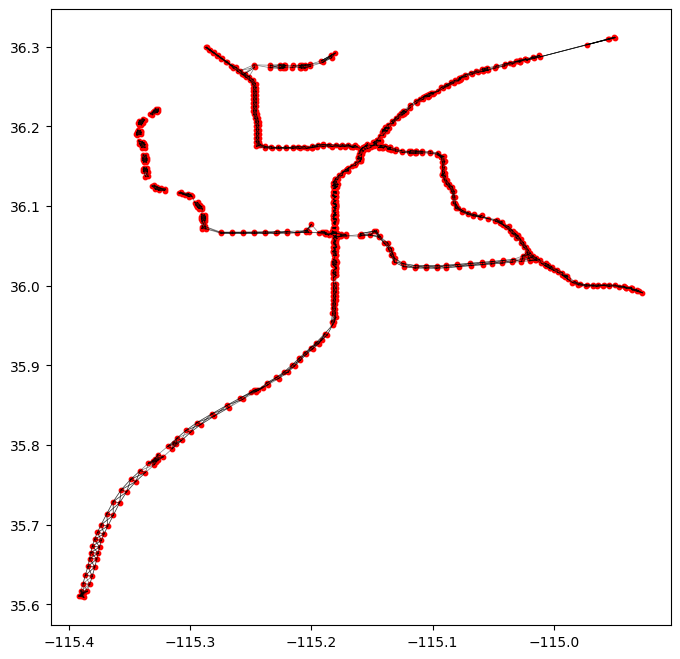

In [69]:
# Plot the graph
plt.figure(figsize=(8, 8))
for i in range(len(locations)):
    for j, d in graph[i]:
        plt.plot([locations[i][1], locations[j][1]], [locations[i][0], locations[j][0]], 'k-', linewidth=0.5, alpha=0.5)
plt.scatter(locations[:,1], locations[:,0], s=10, c='r')
plt.show()

In [70]:
# Print the adjacency list
for node in graph:
    for neighbor, distance in graph[node]:
        print(f"{node} {neighbor} {distance:.2f}")

0 3 0.00
0 2 0.00
0 1 0.00
0 4 0.01
0 5 0.01
1 2 0.00
1 3 0.00
1 0 0.00
1 4 0.00
1 5 0.01
2 3 0.00
2 1 0.00
2 0 0.00
2 4 0.00
2 5 0.00
3 2 0.00
3 0 0.00
3 1 0.00
3 4 0.00
3 5 0.00
4 5 0.00
4 7 0.00
4 3 0.00
4 2 0.00
4 1 0.00
5 4 0.00
5 7 0.00
5 6 0.00
5 3 0.00
5 2 0.00
6 5 0.00
6 4 0.00
6 7 0.01
6 3 0.01
6 2 0.01
7 4 0.00
7 5 0.00
7 6 0.01
7 2 0.01
7 3 0.01
8 9 0.01
8 6 0.01
8 10 0.01
8 7 0.01
8 5 0.01
9 8 0.01
9 7 0.01
9 6 0.01
9 11 0.01
9 5 0.01
10 11 0.01
10 8 0.01
10 12 0.01
10 9 0.01
10 13 0.01
11 10 0.01
11 9 0.01
11 13 0.01
11 8 0.01
11 12 0.01
12 13 0.01
12 14 0.01
12 15 0.01
12 10 0.01
12 11 0.01
13 12 0.01
13 15 0.01
13 11 0.01
13 14 0.01
13 10 0.01
14 15 0.01
14 16 0.01
14 17 0.01
14 12 0.01
14 13 0.01
15 14 0.01
15 17 0.01
15 16 0.01
15 13 0.01
15 12 0.01
16 17 0.01
16 14 0.01
16 18 0.01
16 15 0.01
16 19 0.01
17 16 0.01
17 15 0.01
17 19 0.01
17 14 0.01
17 18 0.01
18 19 0.01
18 16 0.01
18 20 0.01
18 17 0.01
18 21 0.01
19 18 0.01
19 17 0.01
19 21 0.01
19 16 0.01
19 20 0.01
20